# Titanic: Machine Learning from Disaster

## Workflow
- Defining the Question/Problem
- Acquire training and testing data and Analyse, identify patterns, and explore the data
- Wrangle, prepare, cleanse the data
- Model, predict and solve the problem
- Visualise, report, and present the problem solving steps and final solution

## 1. Defining the Question/Problem
**Titanic: Machine Learning from Disaster**
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

#### Objective
In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy. It is your job to predict if a passenger survived the sinking of the Titanic or not.

For each PassengerId in the test set, you must predict a 0 or 1 value for the Survived variable.

#### Metric
Your score is the percentage of passengers you correctly predict. This is known simply as “accuracy”.

## 2. Acquire & Analyse training and testing data
I downloaded the training and testing dataset from Kaggle and saved it in the same folder as the jupyter notebook

In [1]:
import numpy as np
import pandas as pd
import random as rnd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn.svm import SVC, LinearSVC #Support Vector Machines
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier #Decision tree
from sklearn.linear_model import Perceptron #Perceptron

In [2]:
train_df = pd.read_csv('Data/Titanic/train.csv')
test_df = pd.read_csv('Data/Titanic/test.csv')
combine = [train_df,test_df]

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Observations**

- Which features are categorical?
    - Survived
    - Sex
    - Embarked
    - Pclass

- Which features are numerical?
    - Age
    - Fare
    - SibSp
    - Parch

- Which features are mixed data types?
    - Ticket (mix of numeric and alphanumeric)
    - Cabin (alphanumeric)

- Which features contain blank, null or empty values?
    As shown below using a heatmap, Cabin, Age and Embarked features contain null values

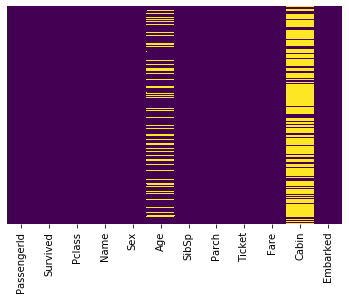

In [4]:
sns.heatmap(train_df.isnull(),cmap='viridis',cbar=False,yticklabels=False)

- In the training data we have 7 features that are integer/floats and 5 strings (object)

- In the testing data we have 6 features that are integer/floats and 5 strings (object)

In [5]:
train_df.info()
print('-'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

**What is the distribution of numerical feature values across the samples?**

In [6]:
train_df.describe(percentiles=[.1,.2,.3,.4,.5,.6,.7,.8,.9,.99])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
10%,90.000000,0.000000,1.000000,14.000000,0.000000,0.000000,7.550000
20%,179.000000,0.000000,1.000000,19.000000,0.000000,0.000000,7.854200
30%,268.000000,0.000000,2.000000,22.000000,0.000000,0.000000,8.050000
40%,357.000000,0.000000,2.000000,25.000000,0.000000,0.000000,10.500000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
60%,535.000000,0.000000,3.000000,31.800000,0.000000,0.000000,21.679200


**Observations**
- Total training samples are 891 whic represents 40% of the actual number of passengers on board the Titanic (2,224 – given in the context)
- `Survived` is a categorical feature with 0 or 1 values
- The training samples indicate a 38% survival rate which is representative of the actual survival rate at 32%
- Nearly 30% of the passengers had siblings and/or spouses aboard
- Fares varied significantly with few passengers (<1%) paying as high as $512
- Few elderly passengers (<1%) within age range 65 – 80

**What is the distribution of categorical features?**

In [7]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Slocovski, Mr. Selman Francis",male,347082,B96 B98,S
freq,1,577,7,4,644


**Observations**
- Each passenger on board has a unique name
- 65% are male (577/891)
- `Cabin` values have several duplicates across samples or several passengers shared a cabin
- `Embarked` takes on 3 possible values. S port used by most passengers
- `Ticket` feature has high ratio of duplicate values (23% – 210/891)

## Assumption based on data analysis
### Data Correlation
- We want to know how well each feature correlates with `Survival`.

### Data Completion
- We may want to complete `Age` feature as it is definitely correlated to `Survival`.
- We may want to complete the `Embarked` feature as it may also correlate with `survival` or another important feature.

### Data Correction
- `Ticket` feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between `Ticket` and `survival`.
- `Cabin` feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.
- `PassengerId` may be dropped from training dataset as it does not contribute to `survival`.
- `Name` feature is relatively non-standard, may not contribute directly to `survival`, so maybe dropped.

### Data Creation
- We may want to create a new feature called `Family` based on `Parch` and `SibSp` to get total count of family members on board.
- We may want to engineer the Name feature to extract `Title` as a new feature.
- We may want to create new feature for `Age` bands. This turns a continous numerical feature into an ordinal categorical feature.
- We may also want to create a `Fare` range feature if it helps our analysis.

### Data Classification
- Women (Sex=female) were more likely to have survived.
- Children (Age<?) were more likely to have survived.
- The upper-class passengers (Pclass=1) were more likely to have survived.

## Assumption verification

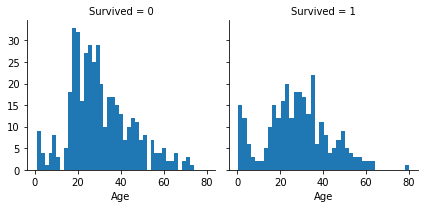

In [8]:
g = sns.FacetGrid(train_df,col='Survived')
g.map(plt.hist,'Age',bins=40)

**Observations**
- Infants (Age <=4) had high survival rate.
- Oldest passengers (Age = 80) survived.
- Large number of 15-25 year olds did not survive.
- Most passengers are in 15-35 age range.

Confirms that we should consider Age in our model training and fill in the null values. We should also band age groups.

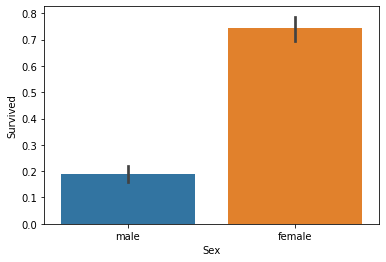

In [9]:
sns.barplot(x='Sex',y='Survived',data=train_df)

The above confirmed our assumption that female were more likely to survived

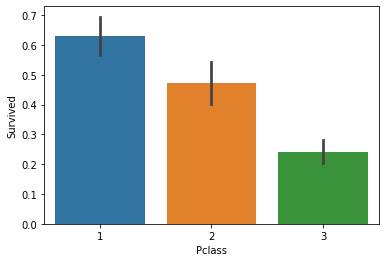

In [10]:
sns.barplot(x='Pclass',y='Survived',data=train_df)

The above confirmed our assumption that the upper-class passengers were more likely to survived

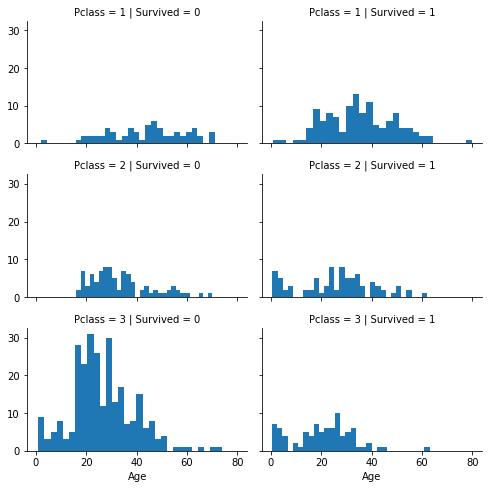

In [12]:
grid = sns.FacetGrid(train_df,row='Pclass',col='Survived',aspect=1.5, height=2.3)
grid.map(plt.hist,'Age',bins=30)

**Observations**
- Pclass 3 had the most passengers, however most did not survive. Confirms our classifying assumption 2
- Infant passengers in Pclass 2 and Pclass 3 mostly survived. Further qualifies our classifying assumption 2
- Most passengers in Pclass 1 survived. Confirms our classifying assumption 3
- Pclass varies in terms of Age distribution of passengers

/Users/pratikajitb/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


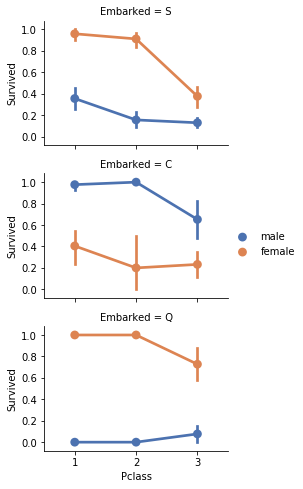

In [16]:
embarked = sns.FacetGrid(train_df,'Embarked',height=2.3, aspect=1.5)
embarked.map(sns.pointplot,'Pclass','Survived','Sex',palette='deep')
embarked.add_legend()

**Observations**
- Female passengers had much better survival rate than males. Confirms classifying 1
- Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived
- Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports. Completing 2
- Ports of embarkation have varying survival rates for Pclass=3 and among male passengers. Correlating 1

/Users/pratikajitb/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


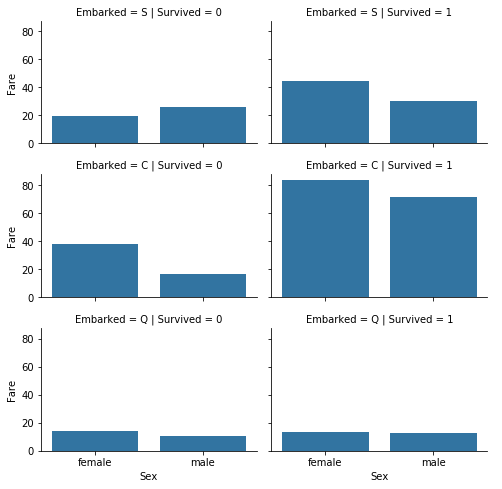

In [17]:
fare = sns.FacetGrid(train_df,row='Embarked',col='Survived',height=2.3,aspect=1.5)
fare.map(sns.barplot,'Sex','Fare',ci=None)
fare.add_legend()

**Observations**
- Higher fare paying passengers had better survival. Confirms our assumption for creating number 4 fare ranges
- Port of embarkation correlates with survival rates. Confirms correlating 1 and completing 2

## 3. Wrangle, prepare and cleanse the data

### Dropping features
Based on our data analysis, we want to drop the `Cabin` and `Ticket` features as Cabin feature is highly incomplete and Ticket feature contains high ratio of duplicates.

In [18]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket','Cabin'],axis=1)
test_df = test_df.drop(['Ticket','Cabin'],axis=1)
combine = [train_df,test_df]

print("After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


In [19]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [20]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


### Creating new features
Based on our analysis, we want to check the correlation between `titles` and `survival` rate before deciding whether to drop the Name and PassengerId features.

To extract `Title` from `Name` feature, we use the RegEx pattern (\w+.) which matches the first word which ends with a dot character within Name feature. The expand=False flag returns a DataFrame.

In [21]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

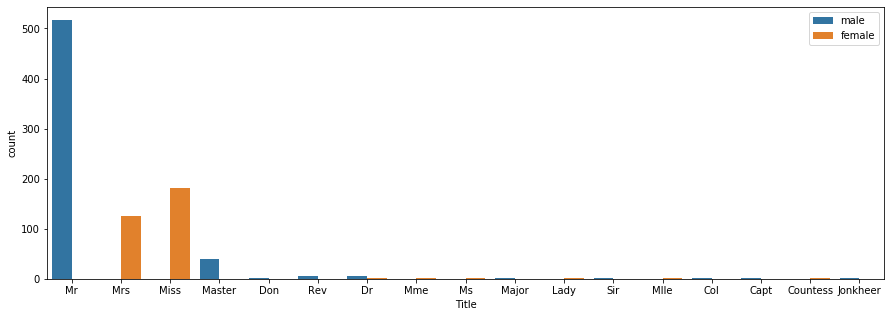

In [22]:
plt.figure(figsize=(15,5))
sns.countplot(train_df['Title'],hue=train_df['Sex'])
plt.legend(loc='upper right')

We can replace many `titles` with a more common name or classify them as Rare

In [24]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [25]:
train_df[['Title','Survived']].groupby('Title',as_index=False).mean().sort_values(by='Survived',ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


Our classifiers only works with numerical values data and so we will need to convert the categorical `Title` to ordinal

In [26]:
title_number = {'Mr':1,'Miss':2,'Mrs':3,'Master':4,'Rare':5}

for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_number)
    dataset['Title'] = dataset['Title'].fillna(0)

Now we can drop the `Name` and `PassengerId` feature from both the training and testing set

In [27]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

### Converting features

In [28]:
train_df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,3


We need to start converting our remaining string objects into numerical values

In [29]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female':1,'male':0}).astype(int)

In [30]:
train_df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3


### Completing features
We need to complete the missing data for the `Age` feature. I will be computing the average age for each passenger class and use it to fill in the missing values.

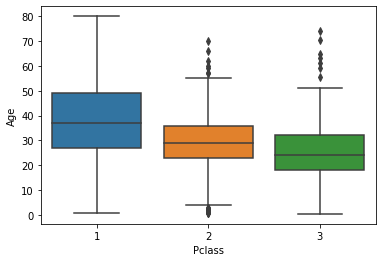

In [31]:
sns.boxplot(x = 'Pclass',y = 'Age', data = train_df)

As shown above, wealthier people (higher Pclass) tend to have a higher average age!

In [32]:
def impute_age_train(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        else:
            return 25
    else:
        return int(Age)

In [33]:
def impute_age_test(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 41
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return int(Age)

In [34]:
train_df['Age'] = train_df[['Age','Pclass']].apply(impute_age_train,axis=1)

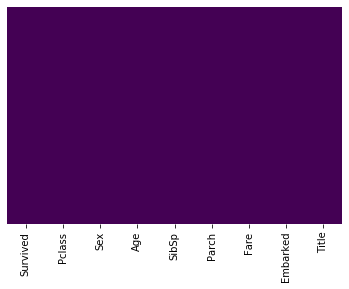

In [35]:
sns.heatmap(train_df.isnull(),cmap = 'viridis',yticklabels=False,cbar=False)

In [36]:
test_df['Age'] = test_df[['Age','Pclass']].apply(impute_age_test,axis=1)

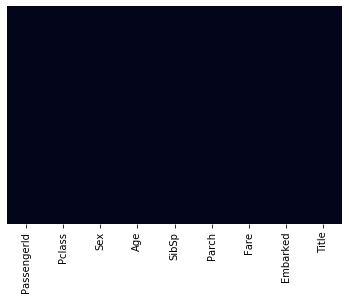

In [37]:
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False)

Creating AgeBand and replacing Age with ordinals based on these bands

In [38]:
train_df['AgeBand'] = pd.cut(train_df['Age'],5)
train_df[['AgeBand','Survived']].groupby(['AgeBand'],as_index=False).mean().sort_values(by='AgeBand',ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [40]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


Now we can remove the AgeBand

In [41]:
train_df = train_df.drop('AgeBand', axis = 1)
combine = [train_df,test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


### Creating new features by combining existing features

We can create a new feature called `FamilySize` by combining `Parch` and `SibSp`, which allows us to reduce our datasets by dropping `Parch` and `SibSp`

In [43]:
for dataset in combine:
    dataset['FamilySize'] = dataset['Parch'] + dataset['SibSp'] + 1

In [44]:
train_df[['FamilySize','Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived',ascending = False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [45]:
train_df[train_df['FamilySize'] == 8]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
59,0,3,0,0,5,2,46.9,S,4,8
71,0,3,1,0,5,2,46.9,S,2,8
386,0,3,0,0,5,2,46.9,S,4,8
480,0,3,0,0,5,2,46.9,S,4,8
678,0,3,1,2,1,6,46.9,S,3,8
683,0,3,0,0,5,2,46.9,S,1,8


We can go a step further by creating a new feature called IsAlone

In [46]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

In [47]:
train_df[['IsAlone','Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


We have succesfully create the new feature `IsAlone`. Now we can drop `SibSp`, `Parch` and `FamilySize`

In [48]:
train_df = train_df.drop(['SibSp','Parch','FamilySize'],axis=1)
test_df = test_df.drop(['SibSp','Parch','FamilySize'],axis=1)
combine = [train_df,test_df]
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


### Completing the Embarked feature and convert it to numeric
In our training data, we have two missing values for `Embarked` feature. We are going to simply fill these with the most common occurence.

In [49]:
train_df[train_df['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
61,1,1,1,2,80.0,NaN,2,1
829,1,1,1,3,80.0,NaN,3,1


In [50]:
freq_port = train_df['Embarked'].dropna().mode()[0]
freq_port

'S'

In [51]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

In [52]:
train_df[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [53]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)

In [54]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,0,1,0
1,1,1,1,2,71.2833,1,3,0
2,1,3,1,1,7.9250,0,2,1
3,1,1,1,2,53.1000,0,3,0
4,0,3,0,2,8.0500,0,1,1


### Completing and converting the Fare feature (and creating a FareBand similar to Age column)
We can quickly fill in the single missing `Fare` value in the test dataset using the mode

In [55]:
test_df[test_df['Fare'].isnull()]

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
152,1044,3,0,3,NaN,0,1,1


In [56]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)

In [57]:
test_df[test_df['Fare'].isnull()]

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone


We can now create a FareBand and convert the fare feature to ordinal values based on the FareBand

In [58]:
train_df['FareBand'] = pd.qcut(train_df['Fare'],4)

In [60]:
train_df[['FareBand','Survived']].groupby(['FareBand'],as_index=False).mean().sort_values(by='FareBand',ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [61]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
dataset['Fare'] = dataset['Fare'].astype(int)

In [62]:
train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]

In [63]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,0.0,0,1,0
1,1,1,1,2,3.0,1,3,0
2,1,3,1,1,1.0,0,2,1
3,1,1,1,2,3.0,0,3,0
4,0,3,0,2,1.0,0,1,1


In [64]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2,0,2,1,1
1,893,3,1,2,0,0,3,0
2,894,2,0,3,1,2,1,1
3,895,3,0,1,1,0,1,1
4,896,3,1,1,1,0,3,0


## 4. Model, predict and solve the problem
There are 60+ predictive modelling algorithms to choose from. In order to choose/narrow down to a select few models, we must understand the **type** of problem and **solution** requirement.

Our problem is a classification and regression problem. We want to identify relationship between the binary output (Survived or not) with other features. We are performing supervised learning as we are training our model with a given dataset.

With the two criteria, **Supervised Learning** and **Classification and Regression**, we have selected the following models:

- A. **Logistic Regression**
- B. **Support Vector Machines (including linear)**
- C. **KNN or k-Nearest Neighbors**
- D. **Perceptron**
- E. **Decision Tree**
- F. **Random Forrest**

In [65]:
X_train = train_df.drop('Survived',axis=1)
Y_train = train_df['Survived']
X_test = test_df.drop('PassengerId',axis=1).copy()

### A. Logistic Regression
Logistic Regression is a useful model to run early in the workflow. Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution.

In [67]:
logistic_reg = LogisticRegression(solver='lbfgs')
logistic_reg.fit(X_train,Y_train)

In [ ]:
logistic_pred = logistic_reg.predict(X_test)

In [68]:
accuracy_logistic = round(logistic_reg.score(X_train,Y_train) * 100,2)
accuracy_logistic

81.37

In [69]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df['Correlation'] = pd.Series(logistic_reg.coef_[0])
coeff_df.sort_values(by='Correlation',ascending=False)

,Feature,Correlation
1,Sex,2.193429
5,Title,0.408985
4,Embarked,0.282289
6,IsAlone,0.185954
3,Fare,-0.065545
2,Age,-0.564966
0,Pclass,-1.262582


Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

The table above implies that as Sex value increases(therefore, male to female), the probability of surviving increases the most. Inversely, as Pclass increases(from wealthy to less wealthy), the probability of surviving decreases the most.

### B. Support Vector Machines + Linear SVC
Given a set of training samples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier.

In [71]:
svc = SVC(gamma='scale')
svc.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [72]:
svc_pred = svc.predict(X_test)

In [73]:
accuracy_svc = round(svc.score(X_train,Y_train) * 100,2)
accuracy_svc

83.28

**Linear SVC**

In [74]:
linear_svc = LinearSVC()

In [75]:
linear_svc.fit(X_train,Y_train)

/Users/pratikajitb/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [76]:
linear_svc_pred = linear_svc.predict(X_test)

In [77]:
accuracy_linear_svc = round(linear_svc.score(X_train, Y_train) * 100,2)
accuracy_linear_svc

80.02

### C. KNN
In pattern recognition, the k-Nearest Neighbors algorithm is a non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

In [78]:
knn = KNeighborsClassifier(n_neighbors=3)

In [79]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [80]:
knn_pred = knn.predict(X_test)

In [81]:
accuracy_knn = round(knn.score(X_train,Y_train) * 100,2)
accuracy_knn

84.62

### D. Perceptron
The perceptron is an algorithm that can decide whether an input, represented by a vector of numbers, belongs to some specific class or not. It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector. The algorithm allows for online learning, in that it processes elements in the training set one at a time.

In [82]:
perceptron = Perceptron()

In [83]:
perceptron.fit(X_train,Y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [84]:
perceptron_pred = perceptron.predict(X_test)

In [85]:
accuracy_perceptron = round(perceptron.score(X_train,Y_train) * 100, 2)
accuracy_perceptron

78.34

### E. Decision Tree
A decision tree maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees.

In [86]:
decision_tree = DecisionTreeClassifier()

In [87]:
decision_tree.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [88]:
decision_tree_pred = decision_tree.predict(X_test)

In [89]:
accuracy_decision_tree = round(decision_tree.score(X_train,Y_train) * 100, 2)
accuracy_decision_tree

86.64

### F. Random Forest
Random forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators=100) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

In [90]:
random_forest = RandomForestClassifier(n_estimators=100)

In [91]:
random_forest.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [92]:
random_forest_pred = random_forest.predict(X_test)

In [93]:
accuracy_random_forest = round(random_forest.score(X_train,Y_train) * 100, 2)
accuracy_random_forest

86.64

### Models Comparison

In [94]:
models_comparison = pd.DataFrame({
'Model': ['Logistic Regression', 'Support Vector Machines', 'Linear SVC',
'KNN','Perceptron','Decision Tree','Random Forest'],
'Score': [accuracy_logistic,accuracy_svc,accuracy_linear_svc,
accuracy_knn, accuracy_perceptron, accuracy_decision_tree, accuracy_random_forest]
})
models_comparison.sort_values(by='Score',ascending=False)

,Model,Score
5,Decision Tree,86.64
6,Random Forest,86.64
3,KNN,84.62
1,Support Vector Machines,83.28
0,Logistic Regression,81.37
2,Linear SVC,80.02
4,Perceptron,78.34


### Export results to csv file for submission!

In [95]:
rf_submission = pd.DataFrame({
"PassengerId": test_df["PassengerId"],
"Survived":random_forest_pred
})

In [96]:
rf_submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [97]:
rf_submission.to_csv('Data/Titanic/rf_submission.csv',index=False)